In [1]:
import numpy as np
import cv2
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
import random
import os
imagePaths = sorted(list(paths.list_images("/content/drive/My Drive/dataset/training")))
#print(imagePaths[0])
random.seed(42)
random.shuffle(imagePaths)
#print(imagePaths[0])
#name = imagePaths[0].split(os.path.sep)[-2]
#print(label)
#data = np.array([0][])
labels = None
indes = np.array([[0],])
print(indes.shape)
label = ["Mamta Banerjee", "Mayawati", "Narendra Modi", "Rahul Gandhi" ]
#ind = label.index("DISGUST")
#print(ind)
data = None
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #print(gray)
    gray = gray.reshape(1, 1024)
    #print(gray)
    name = imagePath.split(os.path.sep)[-2]
    print(imagePath.split(os.path.sep)[-2], imagePath.split(os.path.sep)[-1],  imagePath.split(os.path.sep)[-3])
    
    ind = label.index(name)
    indes[0][0] = ind
    if data is None:
        data = gray
        labels = indes
    else:
        data = np.vstack((data, gray))
        labels = np.vstack((labels, indes))
        #break;
    #print(gray.shape)
    #data.append(gray)
    #print(labels.shape)
#print(data.shape)
print(labels[3,])
data = np.array(data, dtype="float")
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=42)
print(trainX.shape)
#print(trainY.shape)
#print(testX.shape)
print(testY[4,])

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(testY[0,])
print(testY[1,])


(1, 1)
Mayawati Mayawati (1).jpg training
Rahul Gandhi rahul-300x200.jpg training
Narendra Modi 130625-niatqarzbc-1574595544.jpeg training
Rahul Gandhi rahul_gandhi_0.jpeg training
Narendra Modi 77027551.jpg training
Narendra Modi PM_Modi_2015.jpg training
Mamta Banerjee Mamata-513x400-513x400-513x400.jpg training
Mamta Banerjee 1598886941_पश्चिम-बंगाल-के-10-करोड़-लोगों-को-मुफ्त-राशन-देने-के-लिए-प्रतिबद्ध-ममता-बनर्जी.png training
Mayawati 887833-srobpkkuyu-1521904040.jpg training
Mamta Banerjee mmm.jpg training
Narendra Modi images.jpg training
Rahul Gandhi Rahul-gandhi_20200617.jpg training
Narendra Modi Untitled.jpg training
Mayawati download (2).jpg training
Rahul Gandhi 27-nistula-ShivGAU2O6H6K4jpgjpg.jpg training
Rahul Gandhi Rahul-Gandhi-454x400-454x40.jpg training
Mamta Banerjee nine-books-by-west-bengal-chief-minister-mamata-banerjee-released-in-kolkata-book-fair.jpg training
Narendra Modi download (2).jpg training
Mamta Banerjee jpg (1).jpg training
Mamta Banerjee 201205182909

Epoch 1/500
5/5 [==============================] - 0s 44ms/step - loss: 1.4719 - acc: 0.2467 - val_loss: 1.4694 - val_acc: 0.3000
Epoch 2/500
5/5 [==============================] - 0s 7ms/step - loss: 1.3942 - acc: 0.3133 - val_loss: 1.4642 - val_acc: 0.3200
Epoch 3/500
5/5 [==============================] - 0s 7ms/step - loss: 1.3663 - acc: 0.3600 - val_loss: 1.4513 - val_acc: 0.2800
Epoch 4/500
5/5 [==============================] - 0s 7ms/step - loss: 1.3341 - acc: 0.4267 - val_loss: 1.4104 - val_acc: 0.3000
Epoch 5/500
5/5 [==============================] - 0s 7ms/step - loss: 1.2993 - acc: 0.4733 - val_loss: 1.4092 - val_acc: 0.3400
Epoch 6/500
5/5 [==============================] - 0s 8ms/step - loss: 1.2608 - acc: 0.5467 - val_loss: 1.4080 - val_acc: 0.3800
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 1.2302 - acc: 0.5800 - val_loss: 1.3897 - val_acc: 0.3600
Epoch 8/500
5/5 [==============================] - 0s 7ms/step - loss: 1.2091 - acc: 0.6200 - va

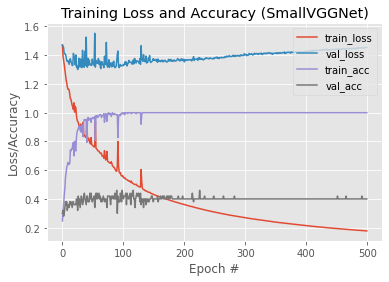

In [4]:
from keras.optimizers import Adam
from matplotlib import pyplot as plt
model = Sequential()
model.add(Dense(2048, input_shape=(1024, ),activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1024, activation='relu'))
#model.add(Dense(2048, activation='sigmoid'))
# model.add(Dense(150, activation='relu'))
# model.add(Dense(50, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['acc'])
H = model.fit(trainX, trainY, epochs=500, batch_size=32,validation_data=(testX, testY))
N = np.arange(0, 500)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("smallvggnet_plot.png")

import h5py
model.save('/content/drive/My Drive/dataset/7599:2233:676:09/Trained_model.h5')


[[[145 160 163]
  [145 160 163]
  [143 160 163]
  ...
  [152 168 175]
  [152 168 175]
  [153 169 176]]

 [[144 159 162]
  [145 160 163]
  [143 160 163]
  ...
  [152 168 175]
  [152 168 175]
  [153 169 176]]

 [[144 159 162]
  [144 159 162]
  [142 159 162]
  ...
  [150 168 175]
  [150 168 175]
  [150 168 175]]

 ...

 [[155 172 175]
  [154 171 174]
  [153 170 173]
  ...
  [  6  16  16]
  [  4  14  14]
  [  1  11  11]]

 [[154 170 176]
  [154 170 176]
  [154 170 176]
  ...
  [  8  19  16]
  [  4  15  12]
  [  3  14  11]]

 [[154 170 176]
  [154 170 176]
  [154 170 176]
  ...
  [  6  26  14]
  [  0  20   7]
  [  0  18   3]]]
[[158 160 160 ... 125  21  48]]
[[0.13997687 0.03365779 0.01859039 0.03408874]]
Mamta Banerjee


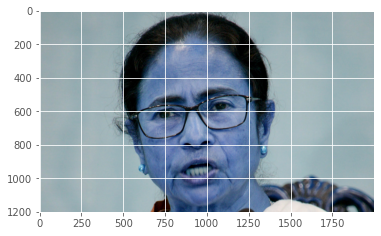

In [34]:
from matplotlib import pyplot as plt
from keras.models import load_model
label = ["Mamta Banerjee", "Mayawati", "Narendra Modi", "Rahul Gandhi" ]
model = load_model('/content/drive/My Drive/dataset/7599:2323:676:09/Trained_model.h5')
samp = cv2.imread("/content/drive/My Drive/dataset/testing/ffd1205e-f88c-4a30-bca5-62e53c9dfae9.jpg")
plt.imshow(samp)
print(samp)
gsamp = cv2.cvtColor(samp, cv2.COLOR_BGR2GRAY)
gsamp = cv2.resize(gsamp, (32, 32))
gsamp = gsamp.reshape(1, 1024)
print(gsamp)
data_samp = np.array(gsamp, dtype="float") 

#test_x = test_x.reshape(4,)
answer = model.predict(data_samp)
print(answer)
i = answer.argmax(axis=1)[0]
print(label[int(i)])
